# MSTL

Here we utilize MSTL only, which is quite time consuming process. The MSTL process is already functionized. Later this is going to be built in a single python file, though here we used jupyter file to observe the result of the decomposition.

MSTL을 따로 class를 만들어서 각 attribute에 data 각 component를 저장해도 될 듯

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
from datetime import timedelta
from datetime import datetime

from statsmodels.tsa.seasonal import MSTL, STL
from statsmodels.tsa.seasonal import DecomposeResult

---

In [3]:
class dataMSTL:
    
    def __init__(self, type_df, code):
        
        self.type_data = type_df
        self.loc_code = code
        self.raw_data = pd.read_csv(f"./dataset_cleaning/{type_df}_data_{code}.csv")

        self.trend = pd.DataFrame()
        self.se24 = pd.DataFrame()
        self.se360 = pd.DataFrame()
        self.se8760 = pd.DataFrame()
        self.resid = pd.DataFrame()
        self.mstl_data = [
            self.trend,
            self.se24,
            self.se360,
            self.se8760,
            self.resid
        ]
        
        
    def my_mstl(self, periods = [24, 24*15, 24*365]):
        timeseries_df = self.raw_data
        
        for i, col in enumerate(timeseries_df.columns):
            if col in ["time", "index"]: continue
            print(str(self.type_data) + " " + str(self.loc_code) + " " + str(col) + " proceeding...               ", end = "\r")

            mstl = MSTL(timeseries_df[col], periods = periods)
            mstl_data = mstl.fit()
            mstl_data.plot()
            mstl_data_trend = mstl_data.trend
            mstl_data_seasonal = mstl_data.seasonal
            mstl_data_residual = mstl_data.resid
            
            self.trend = pd.concat(
                [self.trend, mstl_data_trend],
                axis = 1
            )
            self.se24 = pd.concat(
                [self.se24, mstl_data_seasonal["seasonal_24"]],
                axis = 1
            )
            self.se360 = pd.concat(
                [self.se360, mstl_data_seasonal["seasonal_360"]],
                axis = 1
            )
            self.se8760 = pd.concat(
                [self.se8760, mstl_data_seasonal["seasonal_8760"]],
                axis = 1
            )
            self.resid = pd.concat(
                [self.resid, mstl_data_residual],
                axis = 1
            )
            
        print("")
    
    def my_mstl_sub(self, periods = [24*15]):
        timeseries_df = self.raw_data
        
        for i, col in enumerate(timeseries_df.columns):
            if col in ["time", "index"]: continue
            print(str(self.type_data) + " " + str(self.loc_code) + " " + str(col) + " proceeding...               ", end = "\r")

            mstl = MSTL(timeseries_df[col], periods = periods)
            mstl_data = mstl.fit()
            mstl_data.plot()
            mstl_data_trend = mstl_data.trend
            mstl_data_seasonal = mstl_data.seasonal
            mstl_data_residual = mstl_data.resid
            
            self.trend = pd.concat(
                [self.trend, mstl_data_trend],
                axis = 1
            )
            self.se24 = pd.concat(
                [self.se24, mstl_data_seasonal],
                axis = 1
            )
            self.se8760 = pd.concat(
                [self.se8760, mstl_data_seasonal["seasonal_8760"]],
                axis = 1
            )
            self.resid = pd.concat(
                [self.resid, mstl_data_residual],
                axis = 1
            )
            
        print("")
        
        
    def my_stl(self, period = 2190):
        timeseries_df = self.raw_data

        for i, col in enumerate(timeseries_df.columns):
            if col in ["time", "index"]: continue
            print(str(self.type_data) + " " + str(self.loc_code) + " " + str(col) + " proceeding...               ", end = "\r")

            stl = STL(timeseries_df[col], period = period)
            stl_data = stl.fit()
            stl_data.plot()
            stl_data_trend = stl_data.trend
            stl_data_seasonal = stl_data.seasonal
            stl_data_residual = stl_data.resid

            self.trend = pd.concat(
                [self.trend, stl_data_trend],
                axis = 1
            )
            self.se8760 = pd.concat(
                [self.se8760, stl_data_seasonal],
                axis = 1
            )
            self.resid = pd.concat(
                [self.resid, stl_data_residual],
                axis = 1
            )

        print("")
                                      
    def save_newdata(self, key=""):
        self.trend.to_csv(f"./data_MSTL/MSTL{key}_{self.type_data}_{self.loc_code}_trend.csv")
        self.se24.to_csv(f"./data_MSTL/MSTL{key}_{self.type_data}_{self.loc_code}_se24.csv")
        self.se360.to_csv(f"./data_MSTL/MSTL{key}_{self.type_data}_{self.loc_code}_se360.csv")
        self.se8760.to_csv(f"./data_MSTL/MSTL{key}_{self.type_data}_{self.loc_code}_se8760.csv")
        self.resid.to_csv(f"./data_MSTL/MSTL{key}_{self.type_data}_{self.loc_code}_resid.csv")
            
    

In [4]:
# extra-test
# with simplified MSTL
mstl_sub_cli_402 = dataMSTL("climate", 402)
mstl_sub_cli_403 = dataMSTL("climate", 403)
mstl_sub_cli_413 = dataMSTL("climate", 413)
mstl_sub_cli_415 = dataMSTL("climate", 415)
mstl_sub_cli_421 = dataMSTL("climate", 421)
mstl_sub_cli_510 = dataMSTL("climate", 510)
mstl_sub_cli_889 = dataMSTL("climate", 889)

In [5]:
mstl_sub_lvl_1018640 = dataMSTL("lvl", 1018640)
mstl_sub_lvl_1018662 = dataMSTL("lvl", 1018662)
mstl_sub_lvl_1018680 = dataMSTL("lvl", 1018680)
mstl_sub_lvl_1018683 = dataMSTL("lvl", 1018683)

climate 402 horizon_dir proceeding...                
climate 403 horizon_dir proceeding...                
climate 413 horizon_dir proceeding...                
climate 421 horizon_dir proceeding...                
lvl 1018640 lvl proceeding...               
lvl 1018662 lvl proceeding...               
lvl 1018683 lvl proceeding...               


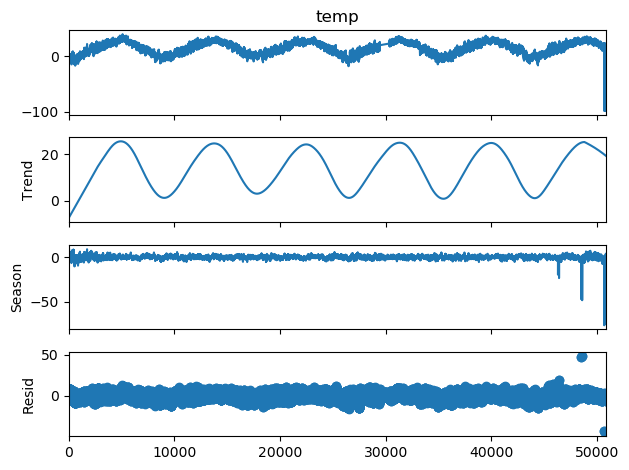

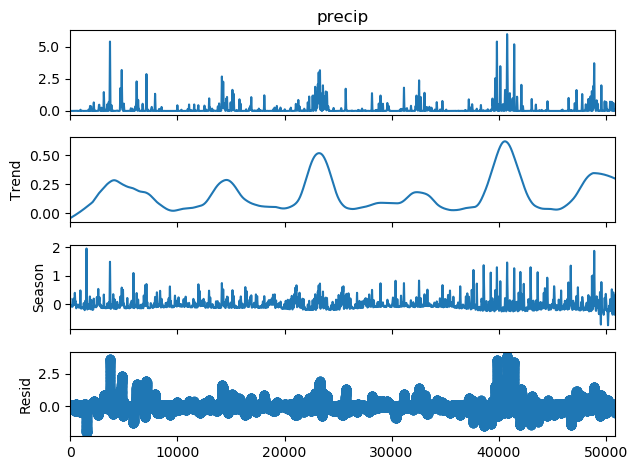

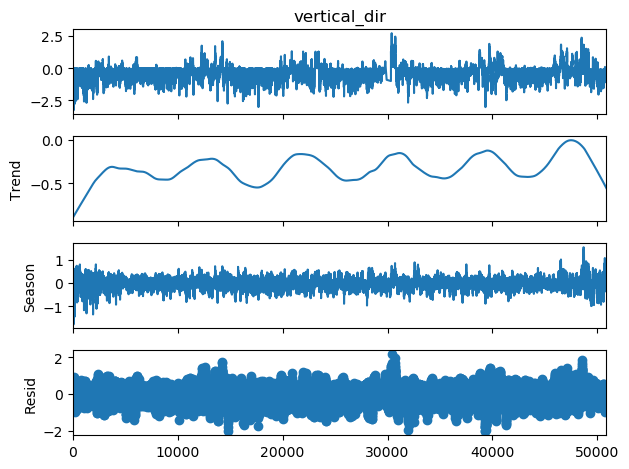

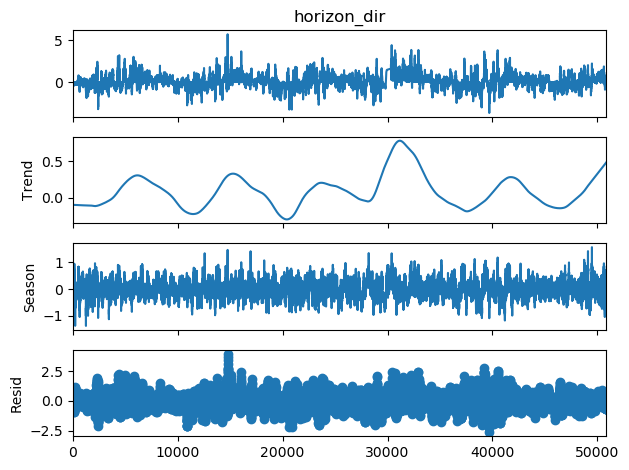

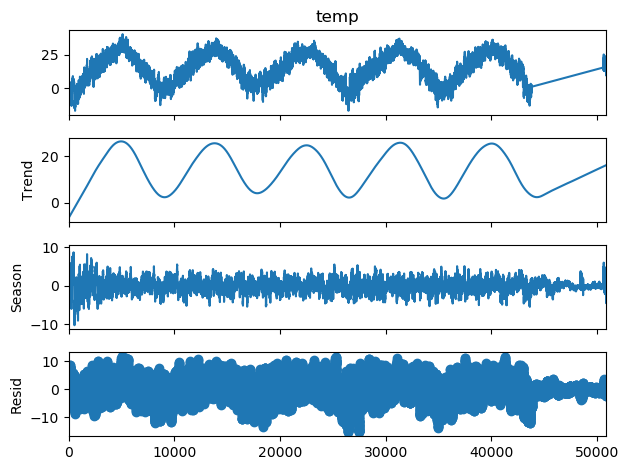

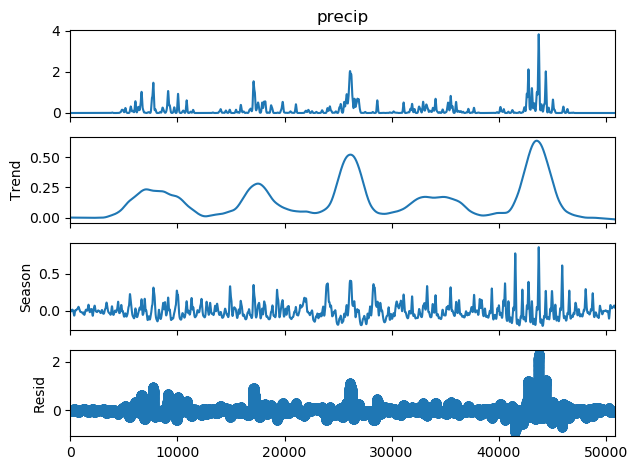

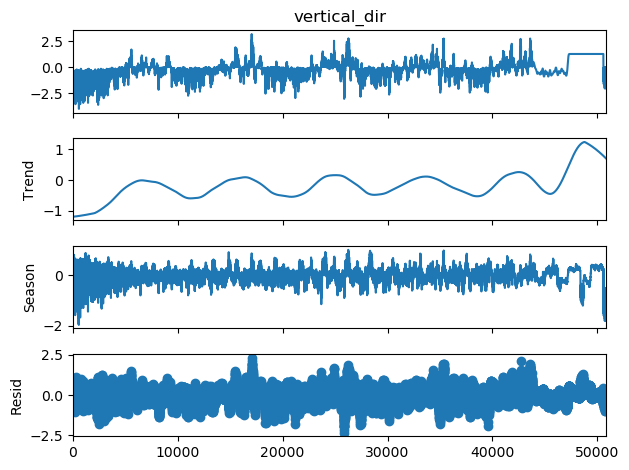

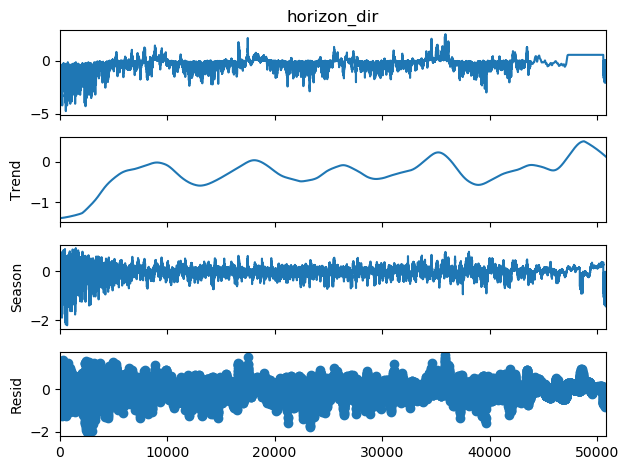

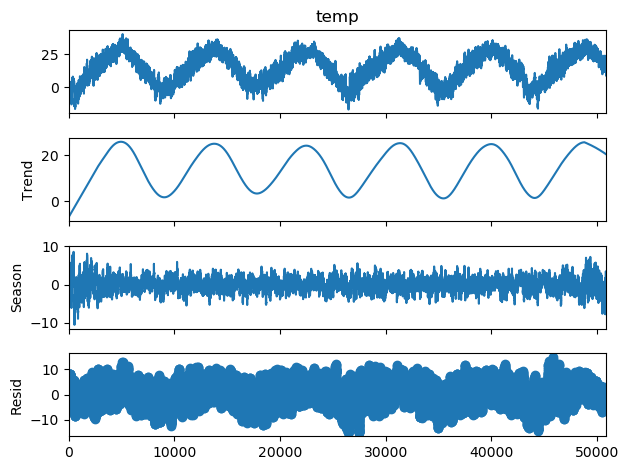

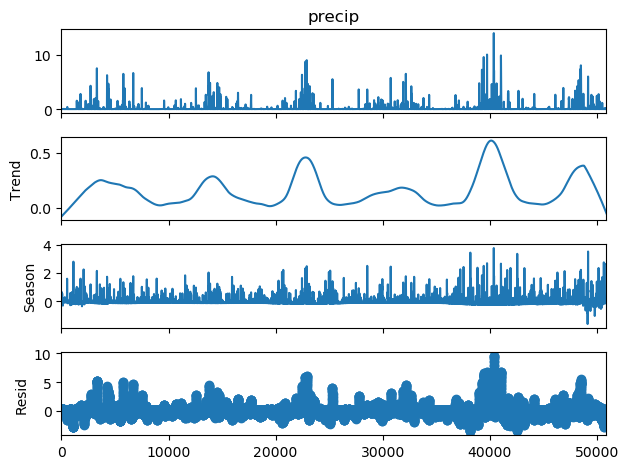

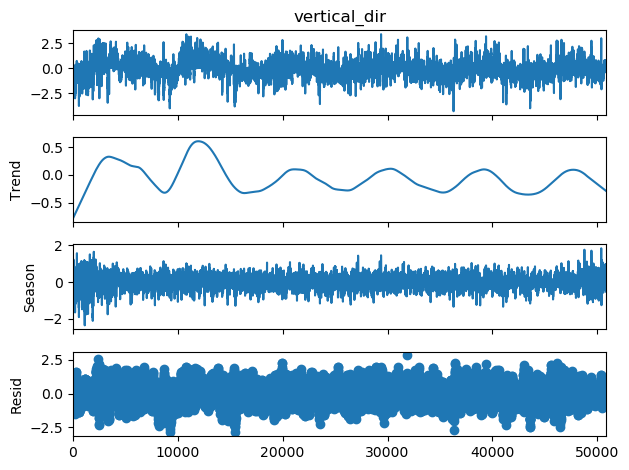

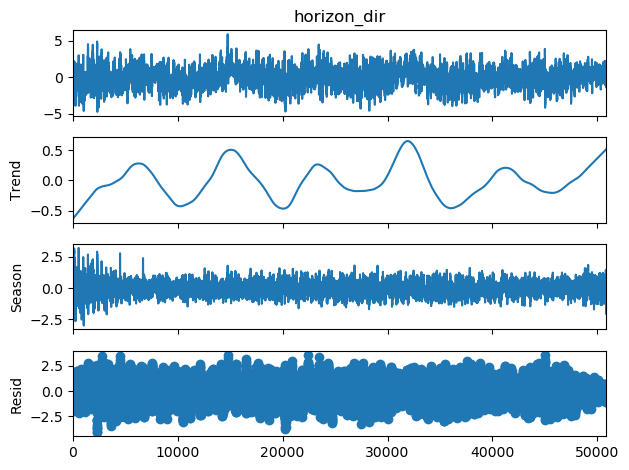

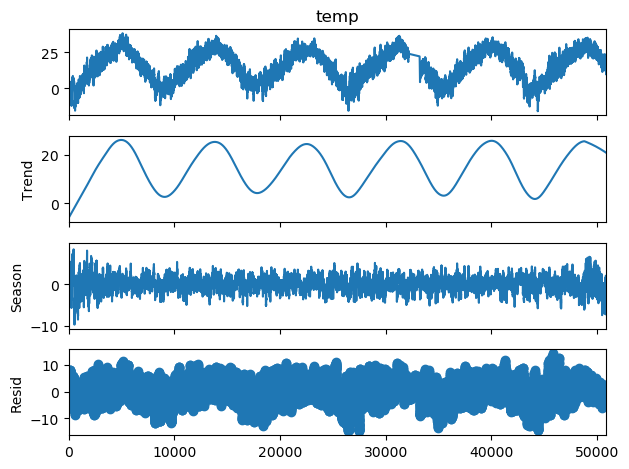

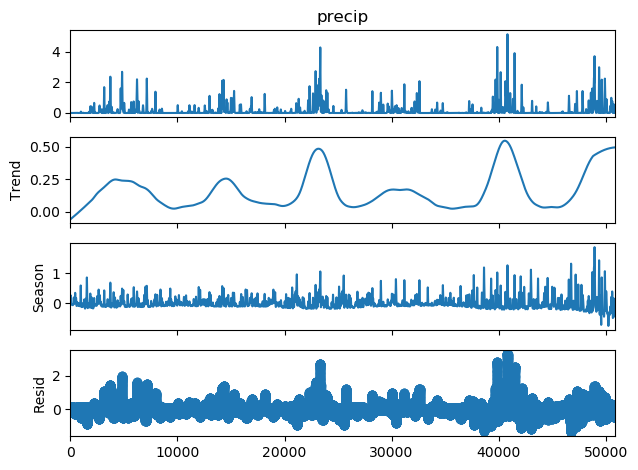

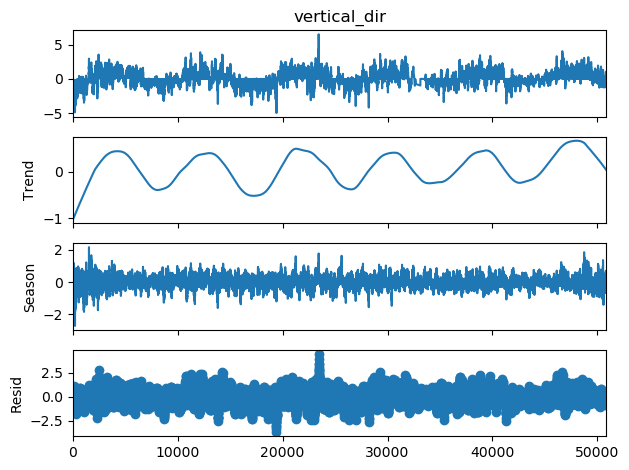

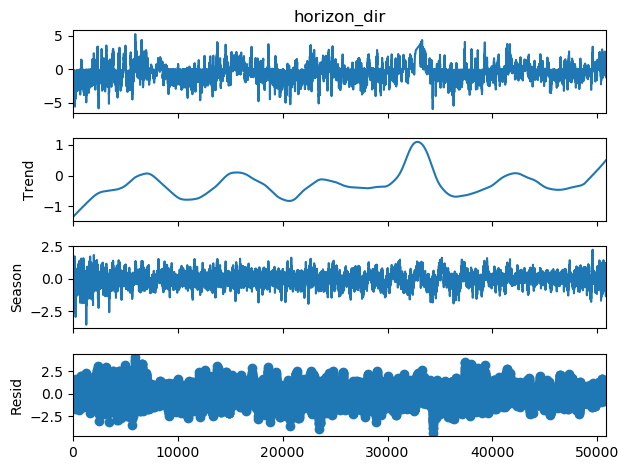

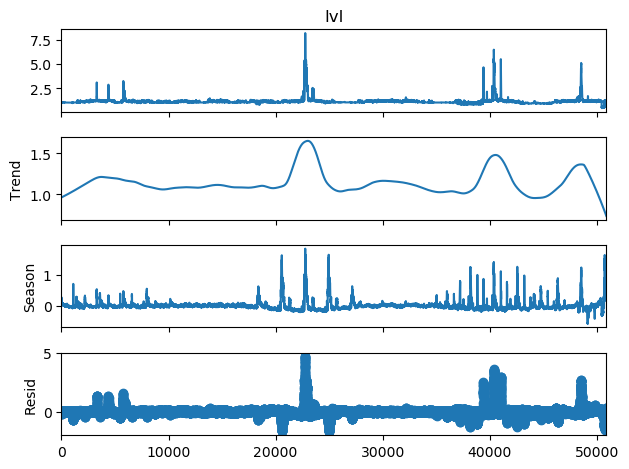

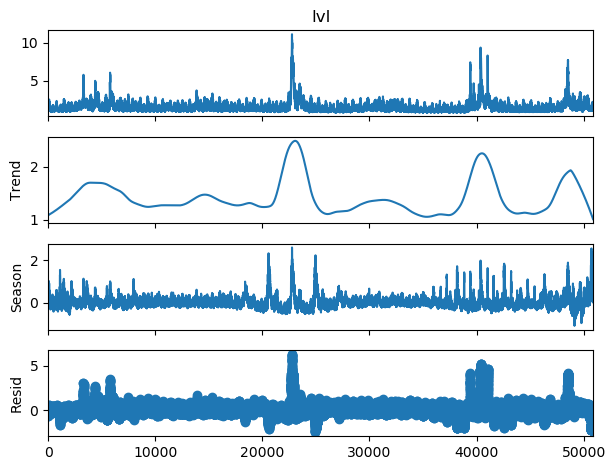

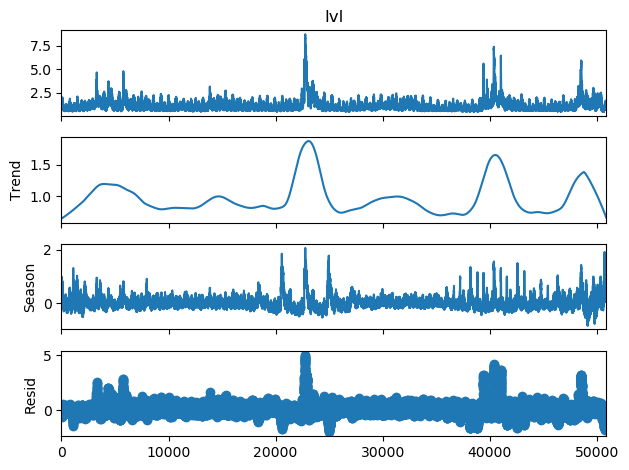

In [6]:
mstl_sub_cli_402.my_stl()
mstl_sub_cli_403.my_stl()
mstl_sub_cli_413.my_stl()
mstl_sub_cli_421.my_stl()
mstl_sub_lvl_1018640.my_stl()
mstl_sub_lvl_1018662.my_stl()
mstl_sub_lvl_1018683.my_stl()

mstl_sub_cli_402.save_newdata(key = "test")
mstl_sub_cli_403.save_newdata(key = "test")
mstl_sub_cli_413.save_newdata(key = "test")
mstl_sub_cli_421.save_newdata(key = "test")
mstl_sub_lvl_1018640.save_newdata(key = "test")
mstl_sub_lvl_1018662.save_newdata(key = "test")
mstl_sub_lvl_1018683.save_newdata(key = "test")

In [1]:
timeseries_df = mstl_sub_cli_402.raw_data
type_data = mstl_sub_cli_402.type_data
loc_code = mstl_sub_cli_402.loc_code
trend = mstl_sub_cli_402.trend
se8760 = mstl_sub_cli_402.se8760
resid = mstl_sub_cli_402.resid
period = 8760

print(str(type_data))

for i, col in enumerate(timeseries_df.columns):
    if col in ["time", "index"]: continue
    # print(str(i)+"\n")
    # print(col+"\n")
    print(type_data + " " + str(loc_code) + " " + str(col) + " proceeding...               ", end = "\r")
    #timeseries_df.index = timeseries_df.index.to_timestamp()
    
    #print(timeseries_df[col])
    
    stl = STL(timeseries_df[col], period = 360)
    stl.fit()
    #stl_data = stl.fit()
#     stl_data.plot()
#     stl_data_trend = stl_data.trend
#     stl_data_seasonal = stl_data.seasonal
#     stl_data_residual = stl_data.resid

#     trend = pd.concat(
#         [self.trend, stl_data_trend],
#         axis = 1
#     )
#     se8760 = pd.concat(
#         [self.se8760, stl_data_seasonal],
#         axis = 1
#     )
#     resid = pd.concat(
#         [self.resid, stl_data_residual],
#         axis = 1
#    )

NameError: name 'mstl_sub_cli_402' is not defined

In [7]:
mstl_sub_cli_402.raw_data.columns

Index(['time', 'temp', 'precip', 'vertical_dir', 'horizon_dir'], dtype='object')

climate 415 horizon_dir proceeding...                


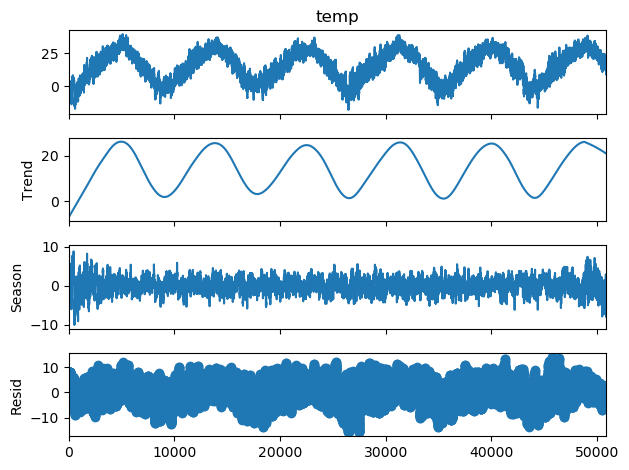

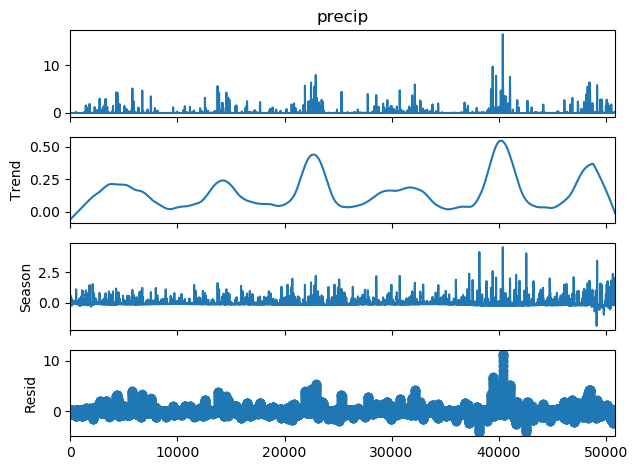

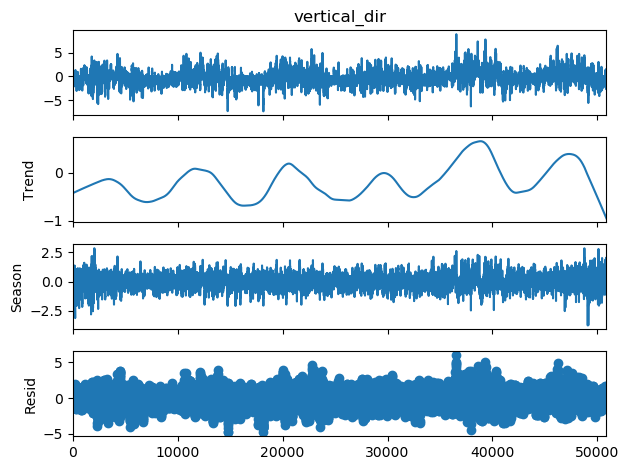

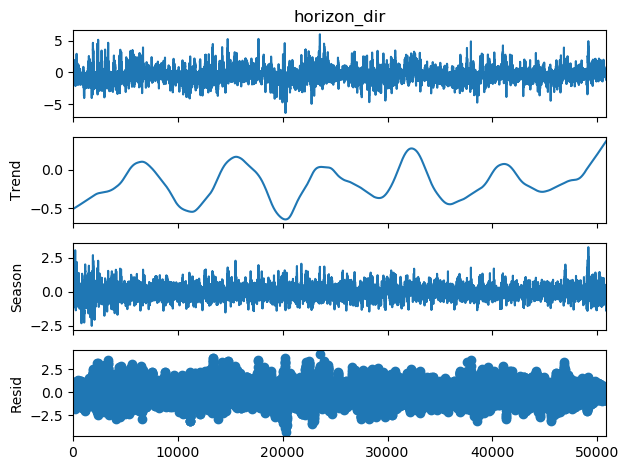

In [4]:
## TEST for 1018680 water level
mstl_sub_cli_415.my_stl()

climate 510 horizon_dir proceeding...                
climate 889 horizon_dir proceeding...                


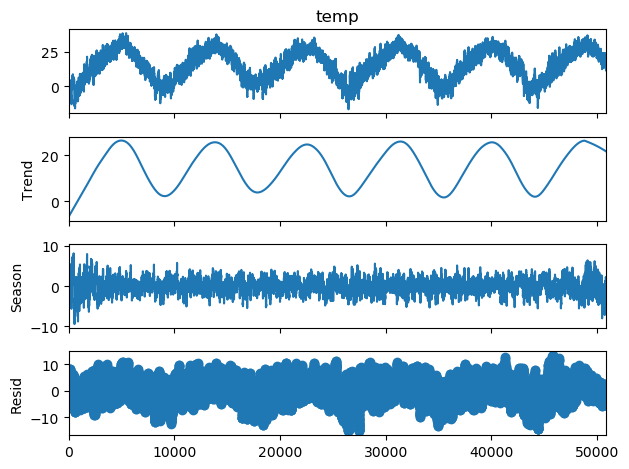

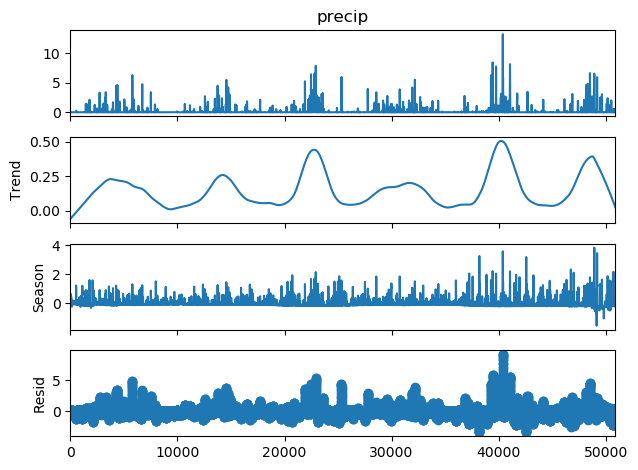

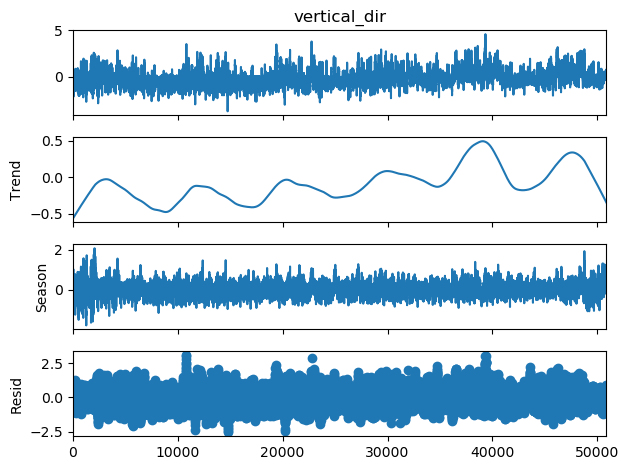

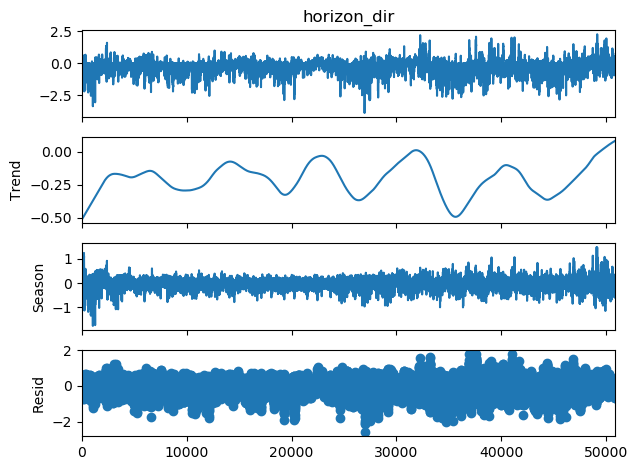

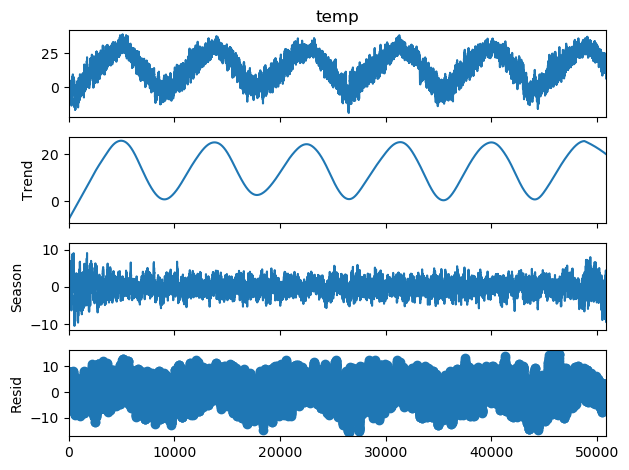

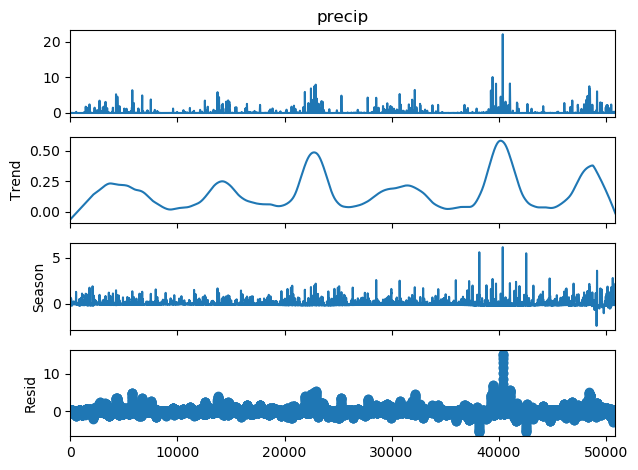

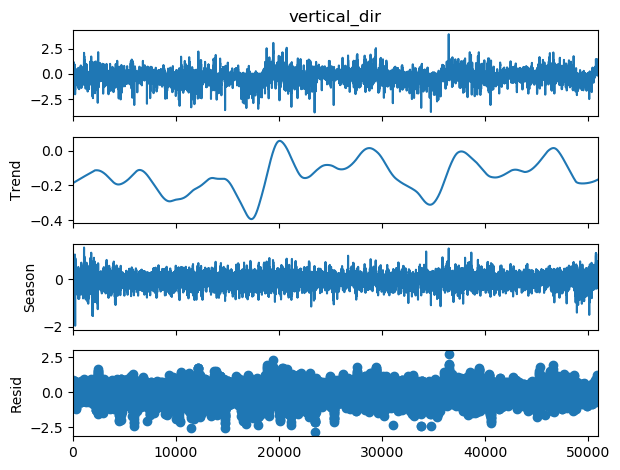

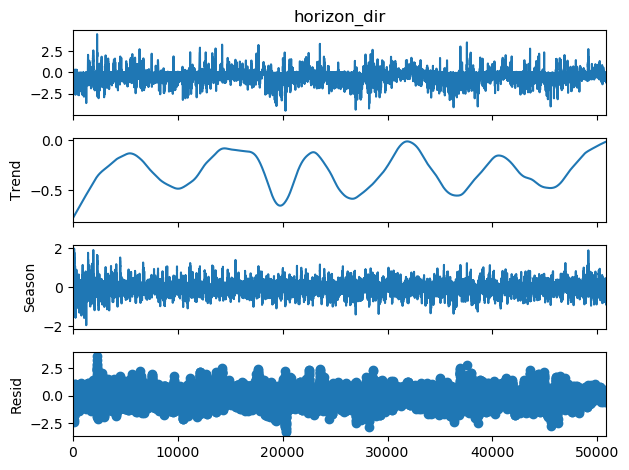

In [5]:
mstl_sub_cli_510.my_stl()
mstl_sub_cli_889.my_stl()

In [6]:
mstl_sub_cli_415.save_newdata(key = "test")
mstl_sub_cli_510.save_newdata(key = "test")
mstl_sub_cli_889.save_newdata(key = "test")

In [ ]:
mstl_sub_cli_402.my_stl()
mstl_sub_cli_403.my_stl()
mstl_sub_cli_413.my_stl()
mstl_sub_cli_415.my_stl()
mstl_sub_cli_421.my_stl()
mstl_sub_cli_510.my_stl()
mstl_sub_cli_889.my_stl()

In [ ]:
mstl_sub_cli_402.save_newdata(key = "3")
mstl_sub_cli_403.save_newdata(key = "3")
mstl_sub_cli_413.save_newdata(key = "3")
mstl_sub_cli_415.save_newdata(key = "3")
mstl_sub_cli_421.save_newdata(key = "3")
mstl_sub_cli_510.save_newdata(key = "3")
mstl_sub_cli_889.save_newdata(key = "3")

In [7]:
mstl_sub_lvl_1018640 = dataMSTL("lvl", 1018640)
mstl_sub_lvl_1018662 = dataMSTL("lvl", 1018662)
mstl_sub_lvl_1018680 = dataMSTL("lvl", 1018680)
mstl_sub_lvl_1018683 = dataMSTL("lvl", 1018683)

lvl 1018680 lvl proceeding...               


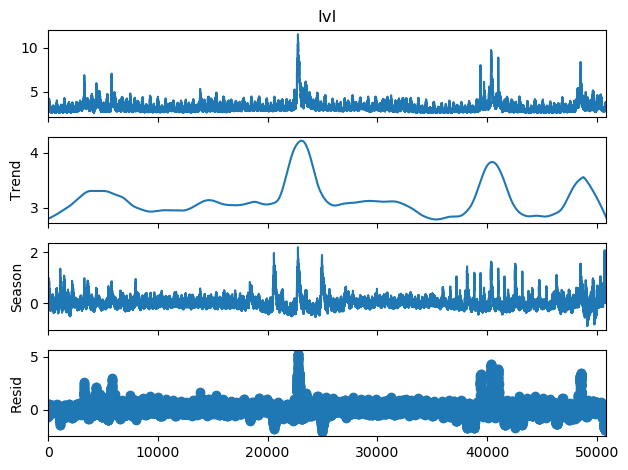

In [8]:
mstl_sub_lvl_1018680.my_stl()

In [9]:
mstl_sub_lvl_1018680.save_newdata(key = "test")

In [13]:
mstl_sub_lvl_1018640.my_mstl_sub()
mstl_sub_lvl_1018662.my_mstl_sub()
mstl_sub_lvl_1018680.my_mstl_sub()
mstl_sub_lvl_1018683.my_mstl_sub()

NameError: name 'mstl_sub_lvl_1018640' is not defined

In [43]:
mstl_sub_lvl_1018640.save_newdata(key = "3")
mstl_sub_lvl_1018662.save_newdata(key = "3")
mstl_sub_lvl_1018680.save_newdata(key = "3")
mstl_sub_lvl_1018683.save_newdata(key = "3")

---

In [ ]:
# test

In [3]:
mstl_cli_402 = dataMSTL("climate", 402)
mstl_cli_403 = dataMSTL("climate", 403)
mstl_cli_413 = dataMSTL("climate", 413)
mstl_cli_415 = dataMSTL("climate", 415)
mstl_cli_421 = dataMSTL("climate", 421)
mstl_cli_510 = dataMSTL("climate", 510)
mstl_cli_889 = dataMSTL("climate", 889)

In [15]:
mstl_cli_402.my_mstl()
mstl_cli_403.my_mstl()
mstl_cli_413.my_mstl()

NameError: name 'mstl_cli_402' is not defined

In [47]:
mstl_cli_402.save_newdata()
mstl_cli_403.save_newdata()
mstl_cli_413.save_newdata()

In [36]:
mstl_cli_402.trend

,trend,trend,trend,trend
0,12.415424,0.177690,-0.563173,0.069602
1,12.415603,0.177686,-0.563145,0.069607
2,12.415781,0.177682,-0.563116,0.069611
3,12.415960,0.177679,-0.563088,0.069615
4,12.416139,0.177675,-0.563060,0.069619
...,...,...,...,...
50631,14.296492,0.033457,-0.280279,-0.024494
50632,14.296578,0.033427,-0.280286,-0.024509
50633,14.296665,0.033398,-0.280294,-0.024524
50634,14.296751,0.033369,-0.280301,-0.024539


climate 415 horizon_dir proceeding...                
climate 421 horizon_dir proceeding...                


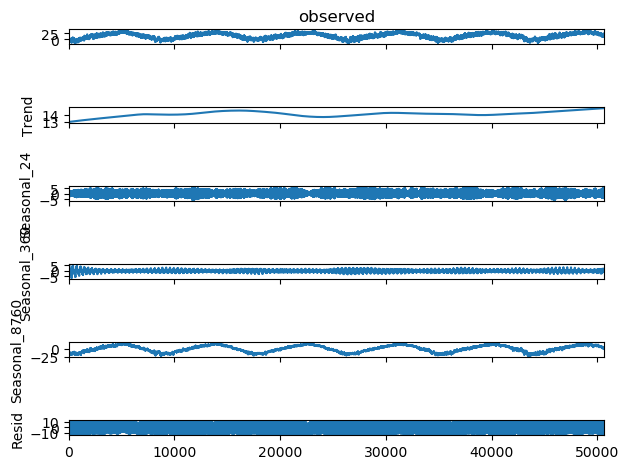

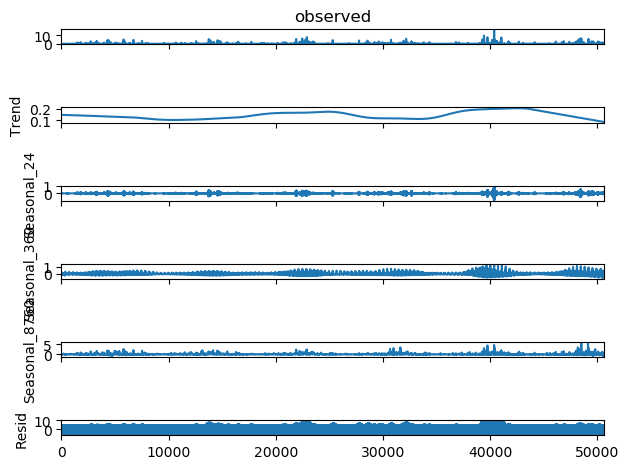

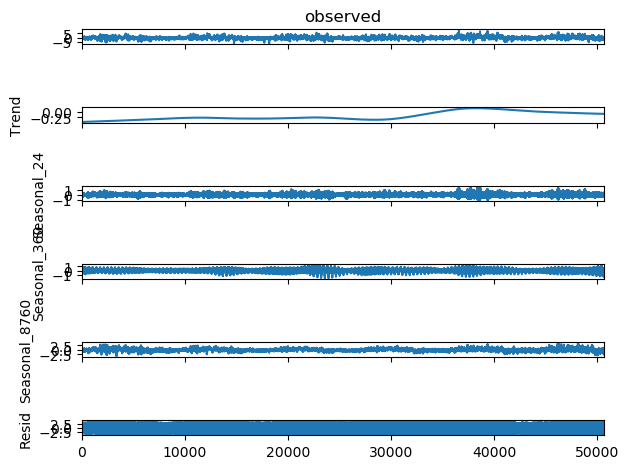

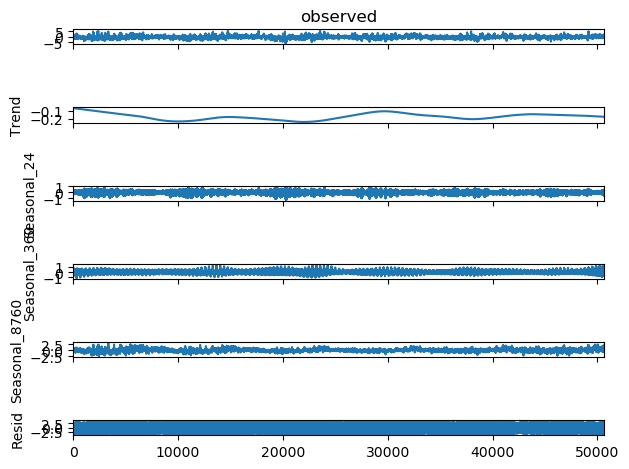

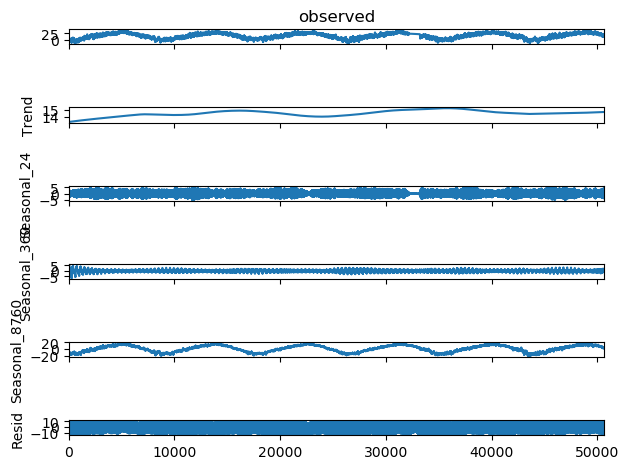

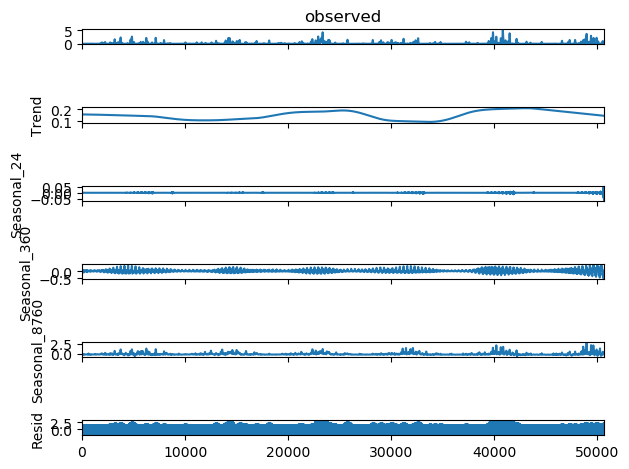

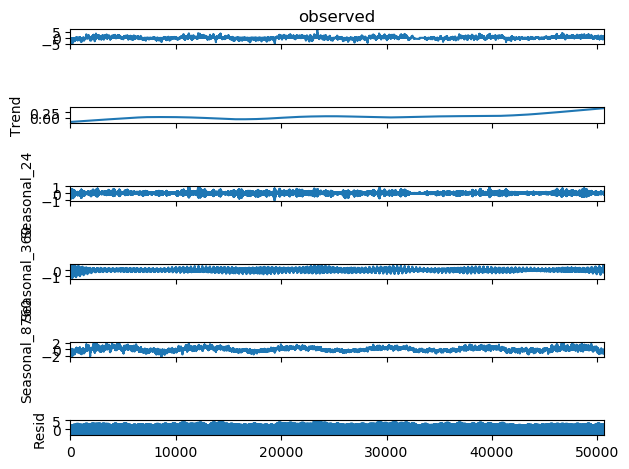

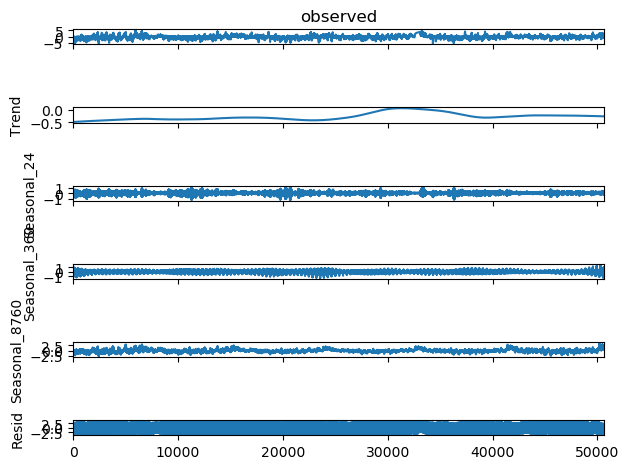

In [41]:
mstl_cli_415.my_mstl()
mstl_cli_421.my_mstl()

In [48]:
mstl_cli_415.save_newdata()
mstl_cli_421.save_newdata()

climate 510 horizon_dir proceeding...                


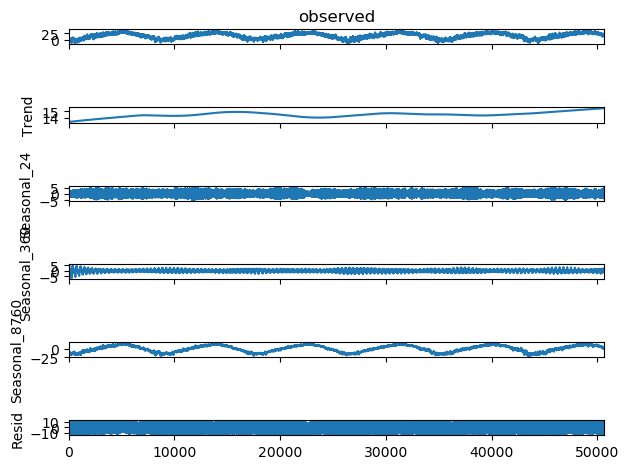

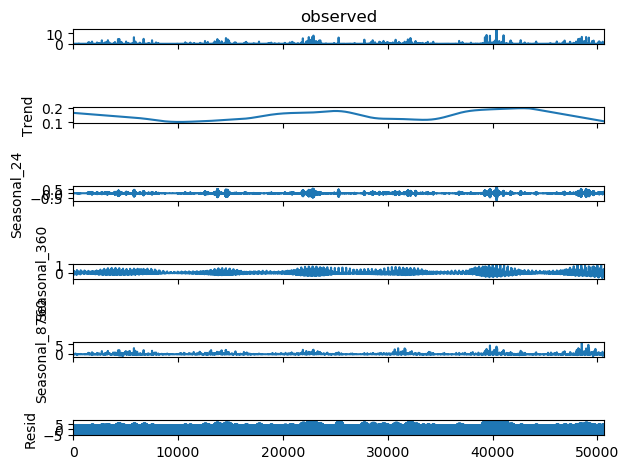

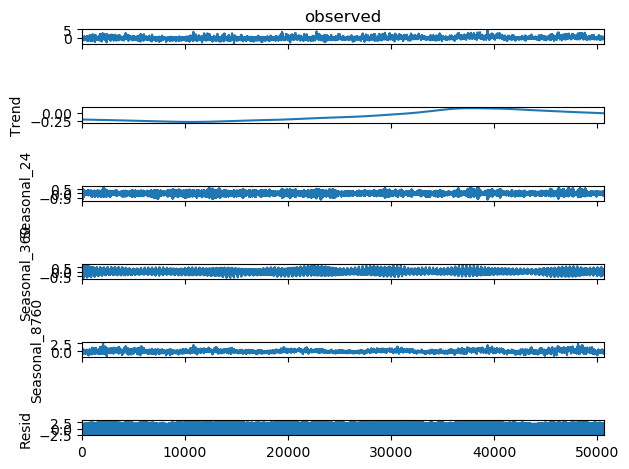

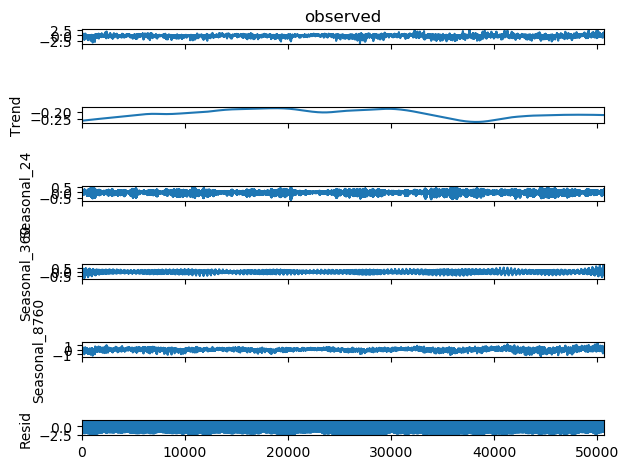

In [30]:
mstl_cli_510.my_mstl()

In [32]:
mstl_cli_510.save_newdata()

climate 889 horizon_dir proceeding...                


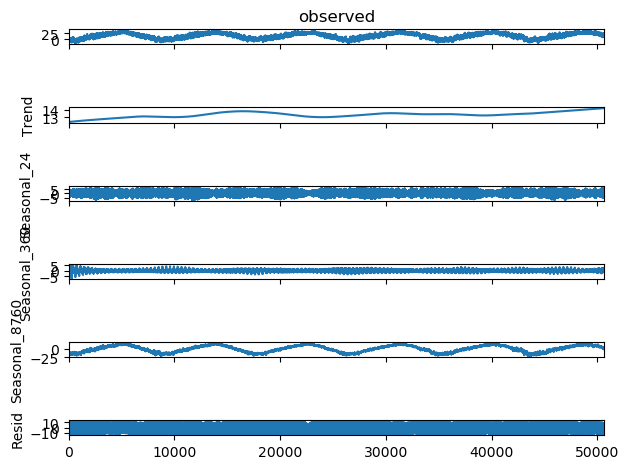

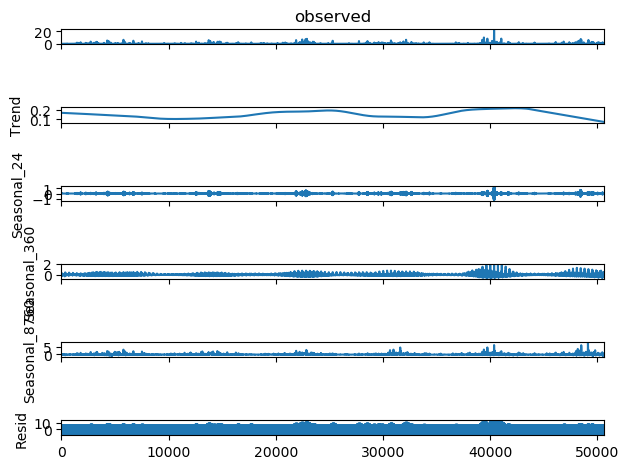

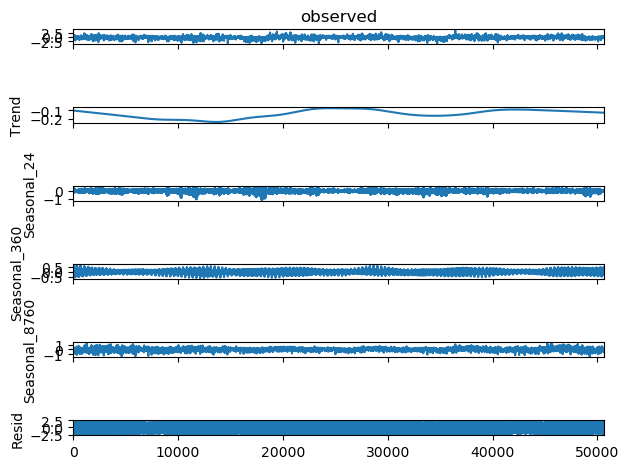

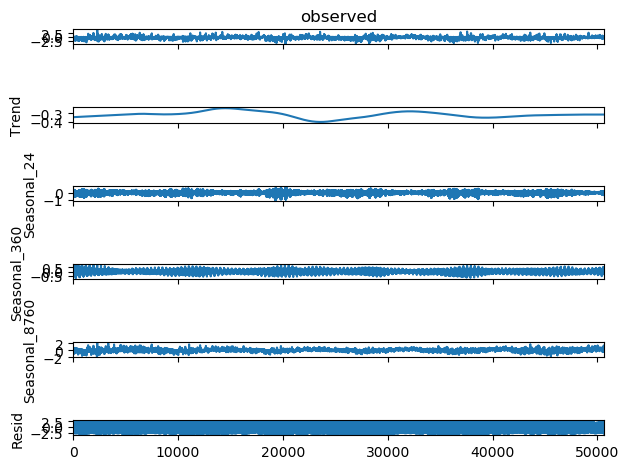

In [5]:
mstl_cli_889.my_mstl()

In [6]:
mstl_cli_889.save_newdata()

In [25]:
mstl_lvl_1018640 = dataMSTL("lvl", 1018640)
mstl_lvl_1018662 = dataMSTL("lvl", 1018662)
mstl_lvl_1018680 = dataMSTL("lvl", 1018680)
mstl_lvl_1018683 = dataMSTL("lvl", 1018683)

lvl 1018640 lvl proceeding...               


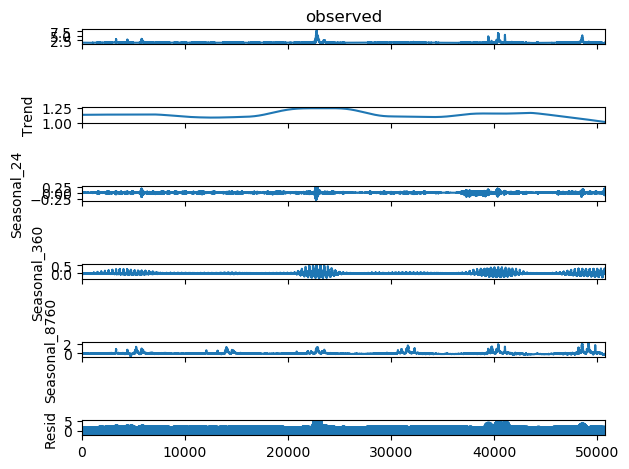

In [26]:
mstl_lvl_1018640.my_mstl()

In [27]:
mstl_lvl_1018640.save_newdata()

lvl 1018662 lvl proceeding...               
lvl 1018680 lvl proceeding...               
lvl 1018683 lvl proceeding...               


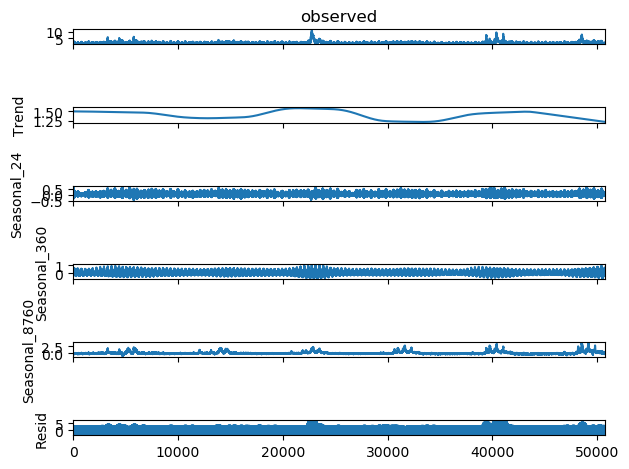

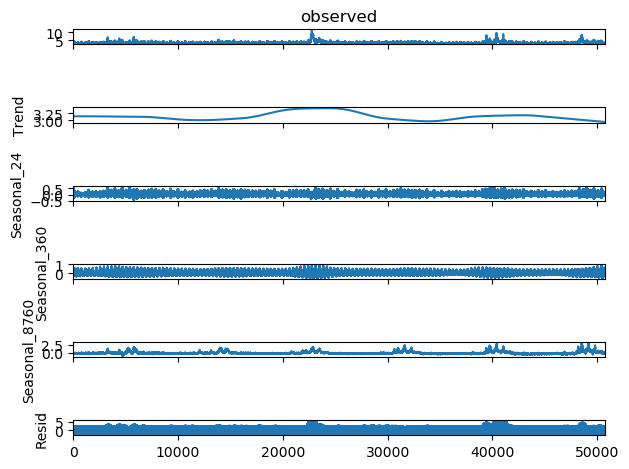

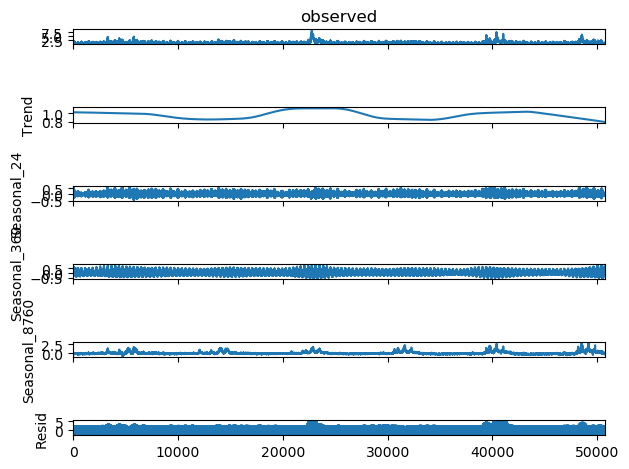

In [28]:
mstl_lvl_1018662.my_mstl()
mstl_lvl_1018680.my_mstl()
mstl_lvl_1018683.my_mstl()

In [29]:
mstl_lvl_1018662.save_newdata()
mstl_lvl_1018680.save_newdata()
mstl_lvl_1018683.save_newdata()

In [19]:
mstl_lvl_1018640.raw_data

,lvl,time
0,1.06,2018-01-01 1:00
1,1.06,2018-01-01 2:00
2,1.06,2018-01-01 3:00
3,1.05,2018-01-01 4:00
4,1.05,2018-01-01 5:00
...,...,...
50682,1.13,2023-10-13 19:00
50683,1.13,2023-10-13 20:00
50684,1.13,2023-10-13 21:00
50685,1.12,2023-10-13 22:00


In [20]:
mstl_lvl_1018640.trend

,trend
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
50682,NaN
50683,NaN
50684,NaN
50685,NaN


In [33]:
asdf = dataMSTL("climate", 402)

climate 402 horizon_dir proceeding...                


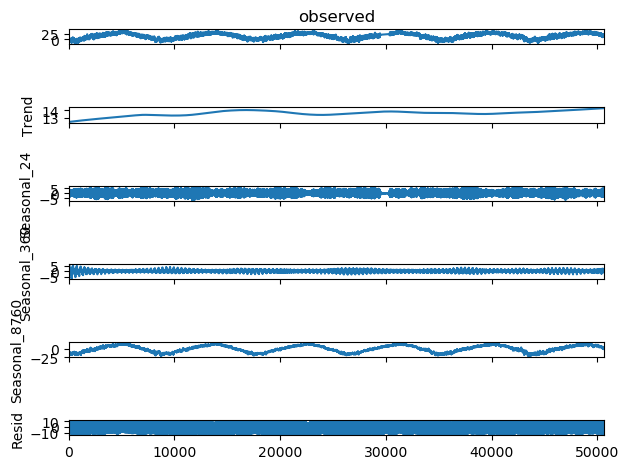

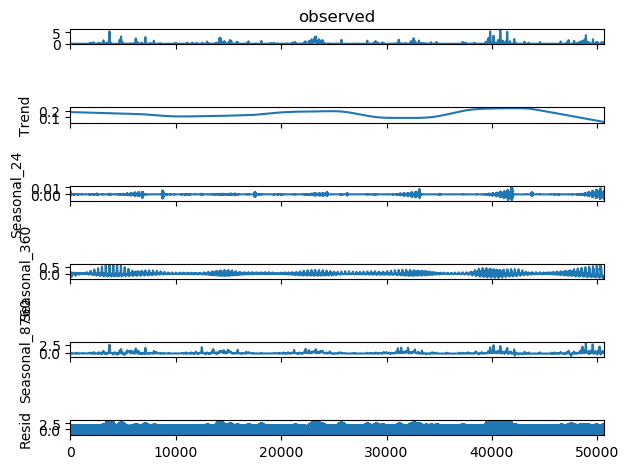

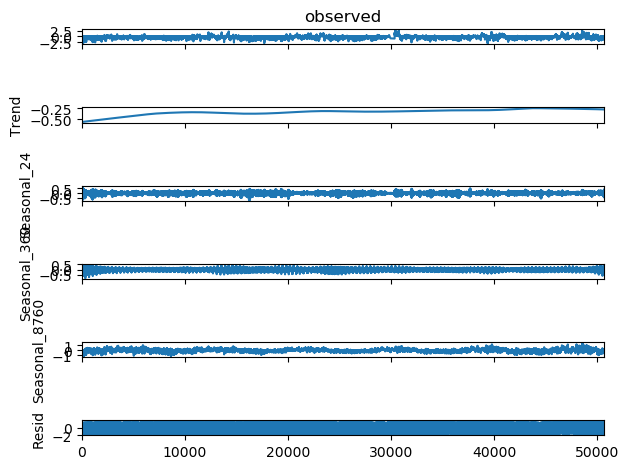

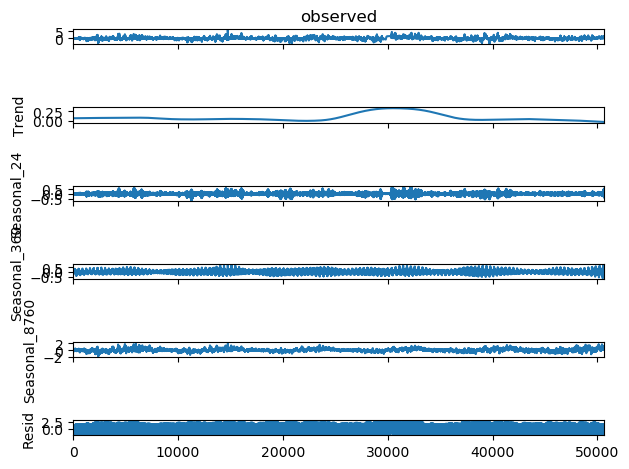

In [34]:
asdf.my_mstl()